<h2>General Data Preprocessing and Logistic Regression Model</h2>

<p>It has an example codebase for preparing data for machine learning and modelling with logistic regression. The code is made up of these major steps:

Data loading and feature selection.
Data preprocessing, including handling missing values and feature standardization.
Classification using logistic regression.
Model performance evaluation and visualization.

These methods can be used for a wide range of machine-learning tasks, as shown by the Titanic survival prediction case. </p>


<h3>1: Data Loading and Preprocessing</h3>

In [14]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from scipy import sparse

In [15]:
# Define constants for labels and columns
LABEL_COLUMN = 'survived'
CATEGORICAL_COLUMNS = ['sex', 'embarked']
NUMERICAL_COLUMNS = ['age', 'sibsp', 'parch', 'fare']

def load_and_preprocess_data(csv_address):
    data = pd.read_csv(csv_address, na_values='?')
    
    # Extrat label and feature dataset from orignal data
    y = data[LABEL_COLUMN]
    X = data.drop(columns=LABEL_COLUMN)

    # Standardize feature data
    # Seperate categorical feature and nunmerical feature data
    selected_columns = CATEGORICAL_COLUMNS + NUMERICAL_COLUMNS 
    X_filtered = X[selected_columns]
    
    # Standardize feature
    # convert the categorical data into numeric feature through pipline
    scaler_cat = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())
    scaler_num = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', scaler_num, NUMERICAL_COLUMNS),
            ('cat', scaler_cat, CATEGORICAL_COLUMNS)
        ])
    
    return preprocessor, X_filtered, y

<h3>Module 2: Model Training and Evaluation</h3>

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [17]:
def train_and_evaluate_model(preprocessor, X_filtered, y):
    # Hyperparameter Optimization with defaulr param_grid
    pipe = make_pipeline(preprocessor, LogisticRegression(solver='lbfgs', random_state=42, max_iter=5000))
    param_grid = {
        'logisticregression__penalty': ['l2'],
        'logisticregression__C': [0.001, 0.01, 0.1, 1.0]
    }
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, return_train_score=True)
    
    scores = cross_validate(grid, X_filtered, y, scoring='balanced_accuracy', cv=3, return_train_score=True, error_score='raise')
    df_scores = pd.DataFrame(scores)
    
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, random_state=42)
    
    grid.fit(X_train, y_train)
    accuracy = grid.score(X_test, y_test)
    
    return df_scores, grid.best_params_, accuracy

<h3>Module 3: Main Function</h3>

Model Performance:
Axes(0.125,0.11;0.775x0.77)
Best Model Parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
Accuracy score of the LogisticRegression model is 0.79


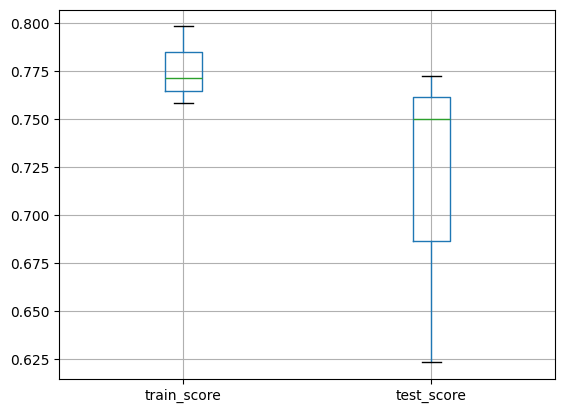

In [18]:
if __name__ == "__main__":
    csv_address = "https://cdn.coggle.club/titanic_openml.csv"
    preprocessor, X_filtered, y = load_and_preprocess_data(csv_address)
    df_scores, best_params, accuracy = train_and_evaluate_model(preprocessor, X_filtered, y)
    print("Model Performance:")
    print(df_scores[['train_score', 'test_score']].boxplot())
    print("Best Model Parameters:", best_params)
    print(f'Accuracy score of the LogisticRegression model is {accuracy:.2f}')